In [110]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [119]:
df = pd.read_csv('student-por.csv',header=0,usecols=['famrel','goout','Dalc','Walc','G1','G2','G3'])
df.head()
print('fds')

fds


In [120]:
# make avarage grades based on three grades
gs = df.iloc[:,4:].values #3 grades matrix
df.drop(['G1','G2','G3'],axis=1,inplace=True)
y = (gs[:,0] + gs[:,1] + gs[:,2])/3 
#add avarage column
df = df.assign(AvgAlc=y)


df.head()

,famrel,goout,Dalc,Walc,AvgAlc
0,4,4,1,1,7.333333
1,5,3,1,1,10.333333
2,4,2,2,3,12.333333
3,3,2,1,1,14.000000
4,4,2,1,2,12.333333


In [121]:
#do normalization
# df = (df - df.mean()) / df.std()  

#set x and y
x = df.iloc[:,:4].values
y = df.iloc[:,4:].values
print(x.shape,y.shape)
df.head()


(649, 4) (649, 1)


,famrel,goout,Dalc,Walc,AvgAlc
0,4,4,1,1,7.333333
1,5,3,1,1,10.333333
2,4,2,2,3,12.333333
3,3,2,1,1,14.000000
4,4,2,1,2,12.333333


[[  0.16405828]
 [ -0.06525274]
 [ -0.48149105]
 [ -0.13524135]
 [ 12.21978795]]


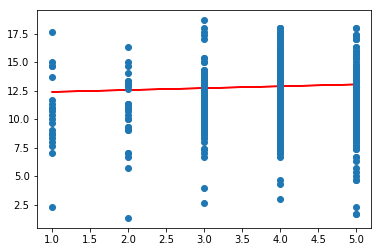

In [135]:
c = np.ones(y.size).reshape(y.size,1)
A=np.hstack((x, c))

# obtaining the parameters
w = np.linalg.lstsq(A,y)[0]
print(w)
# plotting the line
line = w[0]*x[:,0] + w[4] # regression line of family relationships
plt.plot(x[:,0],line,'r-',x[:,0],y,'o')
plt.show()

In [134]:
print('A shape is: ',np.shape(A[:,[0]]))
print('y shape is: ',np.shape(y))
slope, intercept, r_value, p_value, std_err= stats.linregress(A[:,[0]],y)

print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)

line = slope*xi+intercept
plt.plot(xi,line,'r-',xi,y,'o')
plt.show()


A shape is:  (649, 1)
y shape is:  (649, 1)


ValueError: too many values to unpack (expected 4)